In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway

In [35]:
internet = pd.read_csv('Internet-Demographic.csv')

In [36]:
internet

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


<h1>Data Preparation</h1>

In [37]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    195 non-null    object 
 1   Country Code    195 non-null    object 
 2   Birth rate      195 non-null    float64
 3   Internet users  195 non-null    float64
 4   Income Group    195 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


In [38]:
internet.describe()

,Birth rate,Internet users
count,195.000000,195.000000
mean,21.469928,42.076471
std,10.605467,29.030788
min,7.900000,0.900000
25%,12.120500,14.520000
50%,19.680000,41.000000
75%,29.759500,66.225000
max,49.661000,96.546800


In [39]:
internet.describe().T

,count,mean,std,min,25%,50%,75%,max
Birth rate,195.0,21.469928,10.605467,7.9,12.1205,19.68,29.7595,49.6610
Internet users,195.0,42.076471,29.030788,0.9,14.5200,41.00,66.2250,96.5468


<h1>Data Cleansing</h1>
<p>Filling out null values</p>

In [40]:
internet.isnull().sum()

Country Name      0
Country Code      0
Birth rate        0
Internet users    0
Income Group      0
dtype: int64

<h1>Categorical Data Fields</h1>

In [41]:
internet['Country Name'] = internet['Country Name'].astype('category')
internet['Income Group'] = internet['Income Group'].astype('category')

In [42]:
internet.dtypes

Country Name      category
Country Code        object
Birth rate         float64
Internet users     float64
Income Group      category
dtype: object

In [43]:
internet.drop(columns = 'Country Code',inplace = True)

In [44]:
internet

,Country Name,Birth rate,Internet users,Income Group
0,Aruba,10.244,78.9,High income
1,Afghanistan,35.253,5.9,Low income
2,Angola,45.985,19.1,Upper middle income
3,Albania,12.877,57.2,Upper middle income
4,United Arab Emirates,11.044,88.0,High income
...,...,...,...,...
190,"Yemen, Rep.",32.947,20.0,Lower middle income
191,South Africa,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",42.394,2.2,Low income
193,Zambia,40.471,15.4,Lower middle income


<h1>Correlation</h1>

In [45]:
correlation = internet['Internet users'].corr(internet['Birth rate'])
print(f"Correlation between Internet Users and Birth Rate: {correlation:.2f}")

Correlation between Internet Users and Birth Rate: -0.82


<h1>Pie Chart</h1>

In [46]:
income = internet.groupby(['Income Group']).size()
income

Income Group
High income            67
Low income             30
Lower middle income    50
Upper middle income    48
dtype: int64

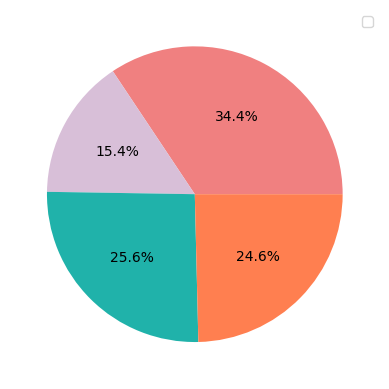

In [76]:
colors = ['lightcoral', 'thistle', 'lightseagreen', 'coral']

plt.pie(income, autopct='%1.1f%%', colors=colors)
plt.legend()
plt.show()


<h1>Q1. : Distribution of Birth Rates</h1>

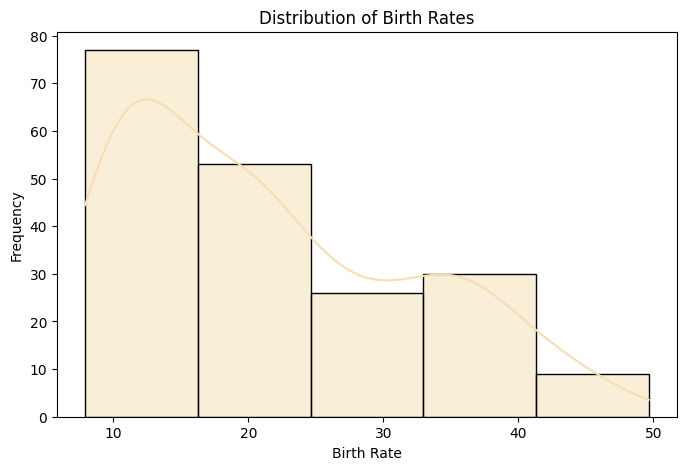

In [75]:
plt.figure(figsize=(8, 5))
sns.histplot(internet["Birth rate"], bins=5, kde=True, color='wheat')
plt.xlabel("Birth Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Birth Rates")
plt.show()


<h1>The data shows that most birth rates fall between 10 and 20, with fewer instances of very high birth rates.</h1>

<h2>Q2: Top 5 Countries with Highest Internet Usage

In [49]:
top_5 = internet.nlargest(5, "Internet users")
top_5

,Country Name,Birth rate,Internet users,Income Group
84,Iceland,13.4,96.5468,High income
22,Bermuda,10.4,95.3000,High income
131,Norway,11.6,95.0534,High income
163,Sweden,11.8,94.7836,High income
47,Denmark,10.0,94.6297,High income


<h1>The top five countries with the highest internet usage are Iceland, Bermuda, Norway, Sweden, and Denmark, which are all high-income nations.</h1>

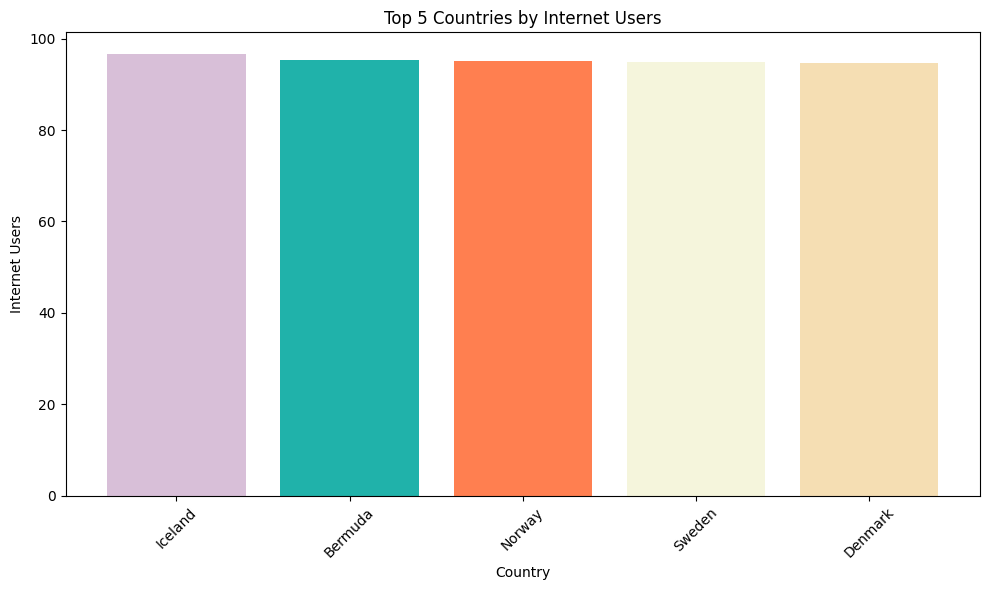

In [73]:
countries = top_5["Country Name"]
internet_users = top_5["Internet users"]

plt.figure(figsize=(10, 6))
plt.bar(countries, internet_users, color=['thistle', 'lightseagreen', 'coral', 'beige', 'wheat'])
plt.xlabel('Country')
plt.ylabel('Internet Users')
plt.title('Top 5 Countries by Internet Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h2>Q3: Count of Countries by Income Group</h2>

In [51]:
income_group_counts = internet['Income Group'].value_counts()
income_group_counts

Income Group
High income            67
Lower middle income    50
Upper middle income    48
Low income             30
Name: count, dtype: int64

<h1>It shows that most countries fall under the high-income group, with 67 countries, followed by lower middle income (50), upper middle income (48), and low income (30) groups.</h1>

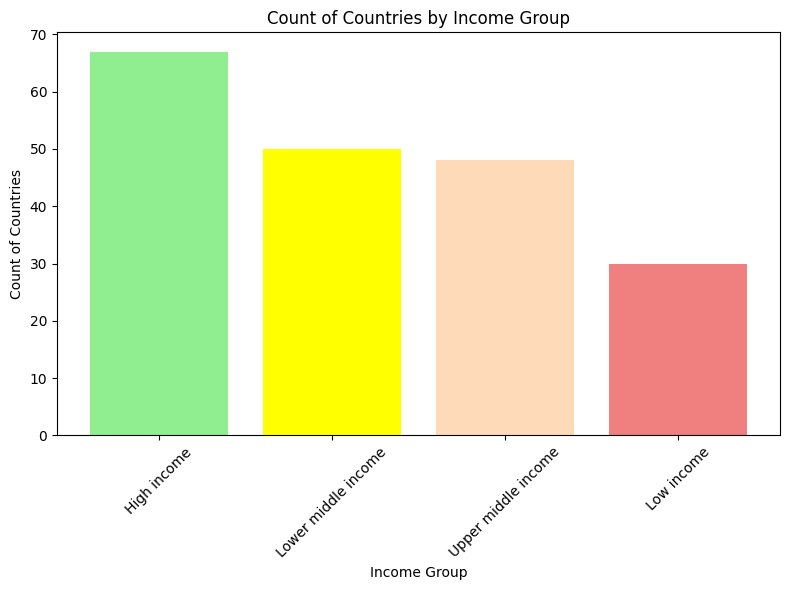

In [72]:
plt.figure(figsize=(8, 6))
plt.bar(income_group_counts.index, income_group_counts.values, color=['lightgreen', 'yellow', 'peachpuff', 'lightcoral'])
plt.xlabel('Income Group')
plt.ylabel('Count of Countries')
plt.title('Count of Countries by Income Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2>Q4: Box Plot of Internet Usage</h2>

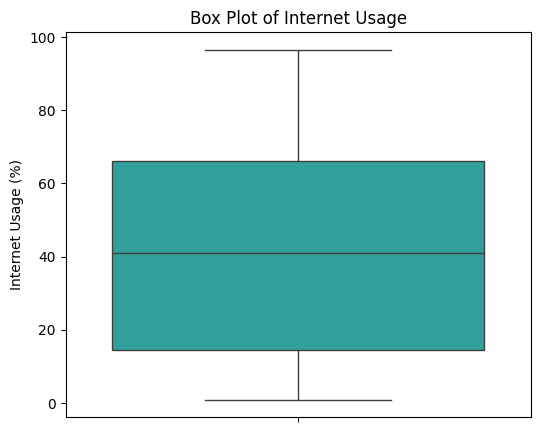

In [71]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=internet["Internet users"], color='lightseagreen')
plt.ylabel("Internet Usage (%)")
plt.title("Box Plot of Internet Usage")
plt.show()


<h1>The data shows above means that the Internet usage is generally high across countries, with no cases of zero connectivity in the data.</h1>

<h2>Q5: Countries with No Internet Access </h2>

In [58]:
low_internet = internet[internet["Internet users"] < 1] 
print("Countries with Very Low Internet Access:", low_internet[["Country Name", "Internet users"]])

Countries with Very Low Internet Access:    Country Name  Internet users
52      Eritrea             0.9


<h1>The data shows that internet access is widespread globally, with all countries exhibiting significant usage and none reporting zero connectivity.</h1>

<h2>Q6: . Average Birth Rate</h2>

In [59]:
avg_birth_rate = internet["Birth rate"].mean()
print(f"Average Birth Rate: {avg_birth_rate:.2f}")

Average Birth Rate: 21.47


<h1>The insight here is that the average birth rate across the dataset is 21.47, indicating a moderate level of births per population unit globally.</h1>

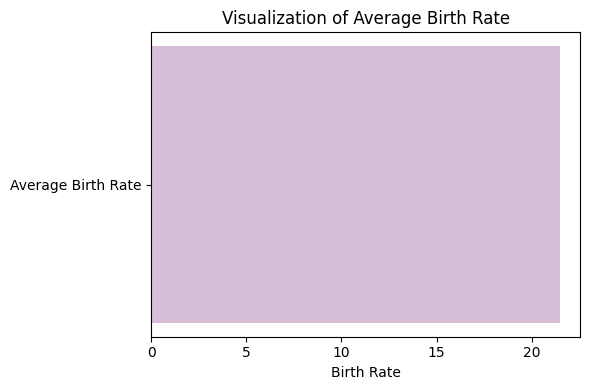

In [70]:
plt.figure(figsize=(6, 4))
plt.barh(["Average Birth Rate"], [avg_birth_rate], color='thistle')
plt.xlabel("Birth Rate")
plt.title("Visualization of Average Birth Rate")
plt.tight_layout()
plt.show()

<h2>Q7: Scatter Plot: Birth Rate vs. Internet Usage</h2>

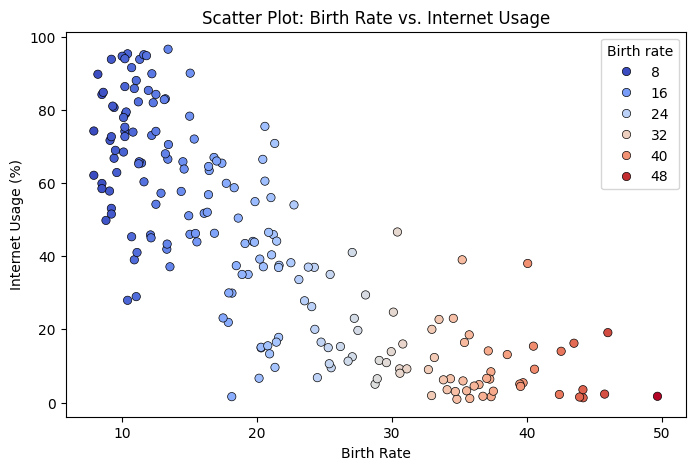

In [62]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Birth rate", y="Internet users", data=internet, hue="Birth rate", palette="coolwarm", edgecolor="black")
plt.xlabel("Birth Rate")
plt.ylabel("Internet Usage (%)")
plt.title("Scatter Plot: Birth Rate vs. Internet Usage")
plt.show()


<h1>The scatter plot shows that as birth rates increase, internet usage decreases. This means countries with lower birth rates often have higher internet access.</h1>

<h2>Q8: Countries with Birth Rate Above 40</h2>

In [63]:
high_brate = internet[internet["Birth rate"] > 40]
print("Countries with Birth Rate Above 40:\n", high_brate)

Countries with Birth Rate Above 40:
          Country Name  Birth rate  Internet users         Income Group
2              Angola      45.985            19.1  Upper middle income
11            Burundi      44.151             1.3           Low income
14       Burkina Faso      40.551             9.1           Low income
65        Gambia, The      42.525            14.0           Low income
115              Mali      44.138             3.5           Low income
127             Niger      49.661             1.7           Low income
128           Nigeria      40.045            38.0  Lower middle income
156           Somalia      43.891             1.5           Low income
167              Chad      45.745             2.3           Low income
178            Uganda      43.474            16.2           Low income
192  Congo, Dem. Rep.      42.394             2.2           Low income
193            Zambia      40.471            15.4  Lower middle income


<h1>The data reveals that countries with birth rates above 40 are mostly low-income nations with limited internet usage. Angola and Nigeria are exceptions, classified as upper and lower middle-income countries respectively.</h1>

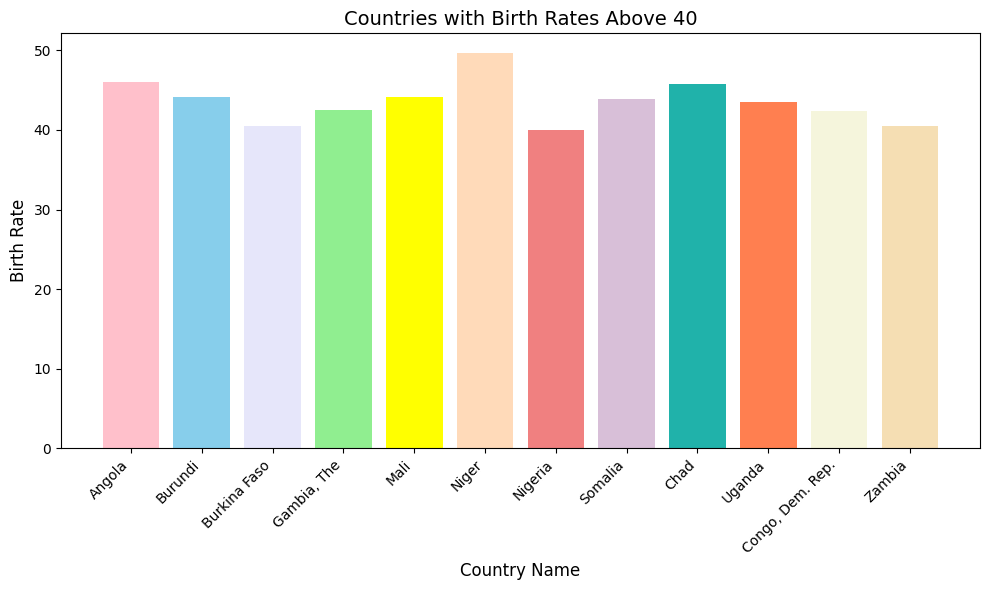

In [66]:
plt.figure(figsize=(10, 6))
plt.bar(high_brate["Country Name"], high_brate["Birth rate"], color = ['pink', 'skyblue', 'lavender', 'lightgreen', 'yellow', 'peachpuff', 'lightcoral', 'thistle', 'lightseagreen', 'coral', 'beige', 'wheat'])
plt.title("Countries with Birth Rates Above 40", fontsize=14)
plt.xlabel("Country Name", fontsize=12)
plt.ylabel("Birth Rate", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


<h2>Q9: Pie Chart of Income Groups</h2>

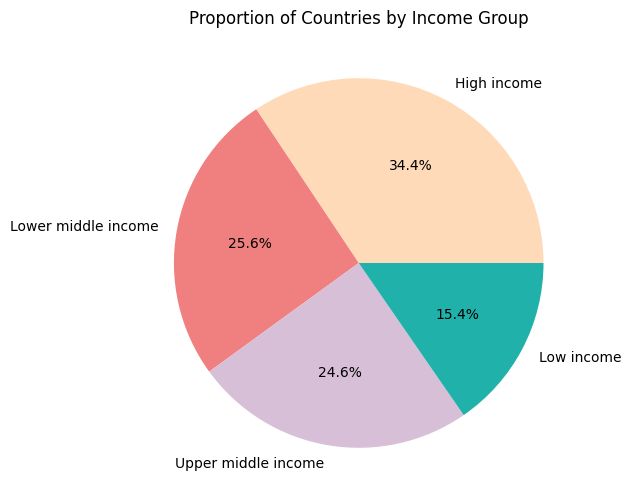

In [67]:
plt.figure(figsize=(6, 6))
internet["Income Group"].value_counts().plot.pie(autopct='%1.1f%%', colors=['peachpuff', 'lightcoral', 'thistle', 'lightseagreen' ])
plt.title("Proportion of Countries by Income Group")
plt.ylabel("")  
plt.show()

<h2>Q10: Correlation Between Birth Rate and Internet Usage</h2>

In [68]:
correlation = internet["Birth rate"].corr(internet["Internet users"])
print(f"Correlation between Birth Rate and Internet Usage: {correlation:.2f}")

Correlation between Birth Rate and Internet Usage: -0.82


<h1>The correlation between birth rate and internet usage is -0.82, which indicates a strong negative relationship. This means that as internet usage increases, birth rates tend to decrease significantly.</h1>

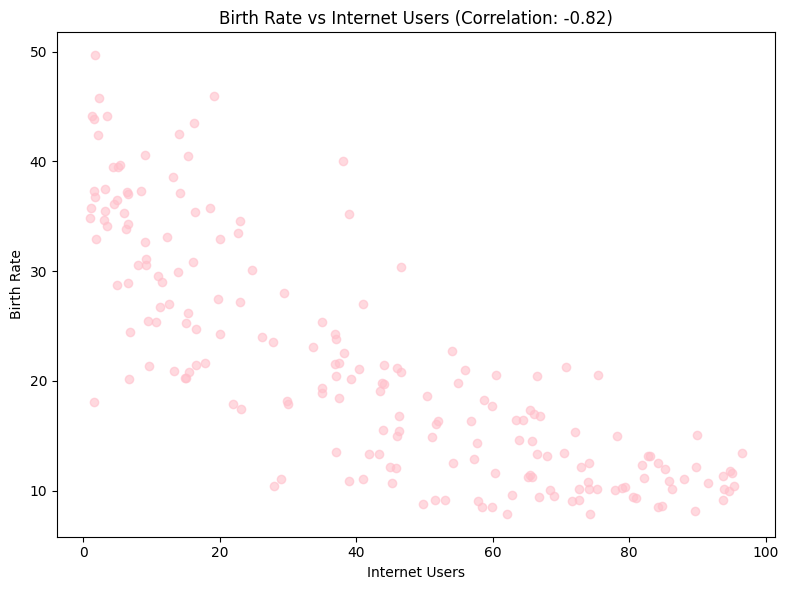

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(internet["Internet users"], internet["Birth rate"], color='pink', alpha=0.6)
plt.xlabel("Internet Users")
plt.ylabel("Birth Rate")
plt.title(f"Birth Rate vs Internet Users (Correlation: {correlation:.2f})")
plt.tight_layout()
plt.show()